## AQI Predicton Model 

In [1]:
#pip install numpy pandas matplotlib 


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 840.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/11.6 MB 840.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/11.6 MB 840.2 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/11.6 MB 501.2 kB/s eta 0:00:22
   -- ------------------------------------- 0.8/11.6 MB 501.2 kB/s eta 0:00:22
   --- ------------------------------------ 1.0/11.6 MB 553.4 kB/s eta 0:00:20
   ---- ----------------------------------- 1.3/11.6 MB 610.3 kB/s eta 0:00:17
   ---- ----------------------------------- 1.3/11.6 MB 610.3 kB/s eta 0:00:17
   ---- ----------------------------------- 1.3/11.6 MB 610.3 kB/s eta 0:00:17
   -----


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
#Iporting Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
df = pd.read_csv('air quality data.csv')
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [68]:
#checking rows and columns
df.shape

(29531, 16)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [70]:
#checking duplicated values
df.duplicated().sum()

0

In [71]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [72]:
df.dropna(subset=['AQI'],inplace = True)

In [73]:
df.isnull().sum().sort_values(ascending=True)

City              0
Date              0
AQI               0
AQI_Bucket        0
NO              387
NO2             391
CO              445
SO2             605
PM2.5           678
O3              807
NOx            1857
Benzene        3535
Toluene        5826
NH3            6536
PM10           7086
Xylene        15372
dtype: int64

In [74]:
df.shape

(24850, 16)

In [75]:
  df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [76]:
null_val_perc = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=True)
null_val_perc

City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
NO             1.557344
NO2            1.573441
CO             1.790744
SO2            2.434608
PM2.5          2.728370
O3             3.247485
NOx            7.472837
Benzene       14.225352
Toluene       23.444668
NH3           26.301811
PM10          28.515091
Xylene        61.859155
dtype: float64

#### Note:

 

- Xylene has the highest percentage of missing values = 61.86%
- PM10 and NH3 28-26%

In [77]:
pip install seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
 import seaborn as sns

## Week 2 Visualization

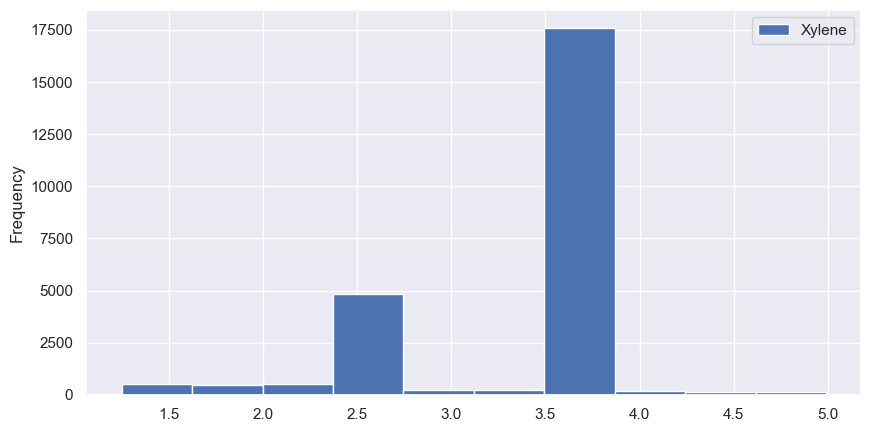

In [125]:
# Analysis of Univariate
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

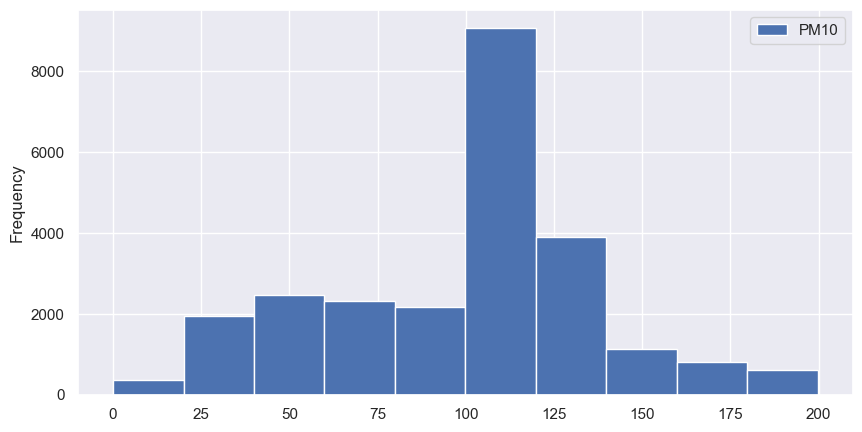

In [126]:
df['PM10'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

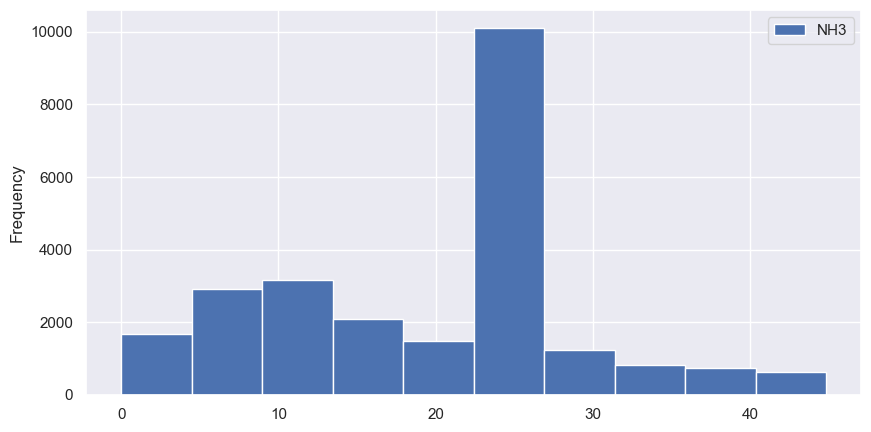

In [127]:
df['NH3'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

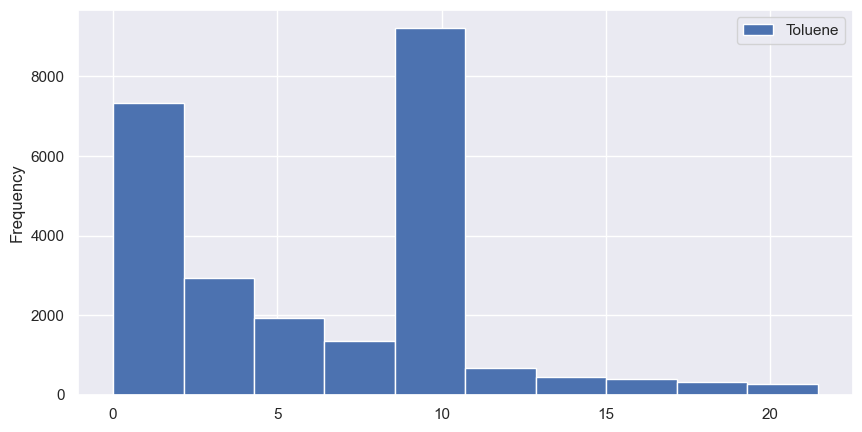

In [128]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

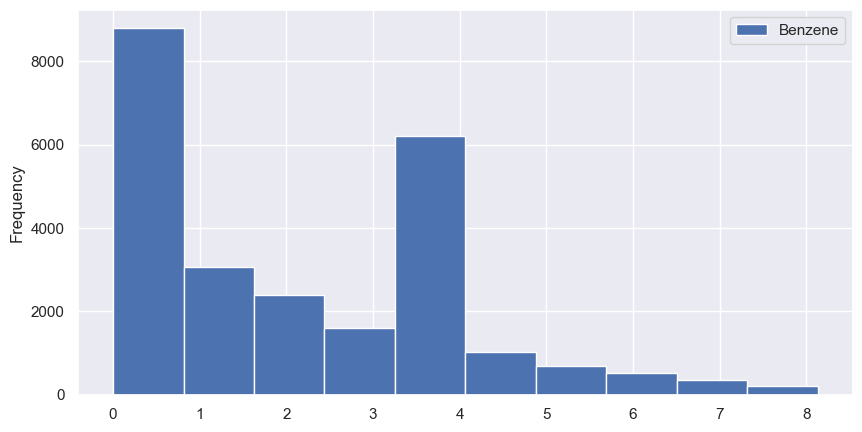

In [129]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

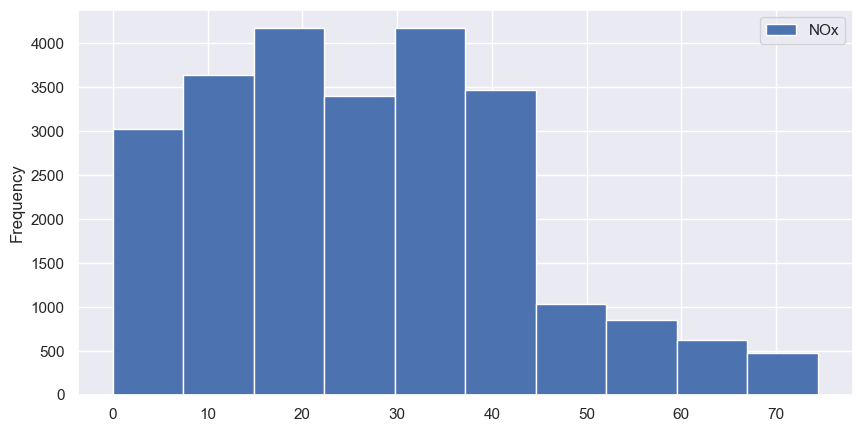

In [130]:
df['NOx'].plot(kind = 'hist', figsize= (10,5))
plt.legend()
plt.show()

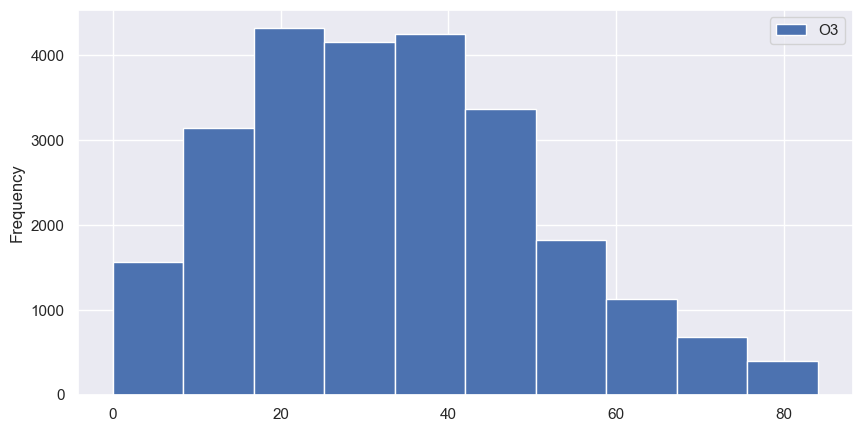

In [131]:
df['O3'].plot(kind = 'hist', figsize= (10,5))
plt.legend()
plt.show()


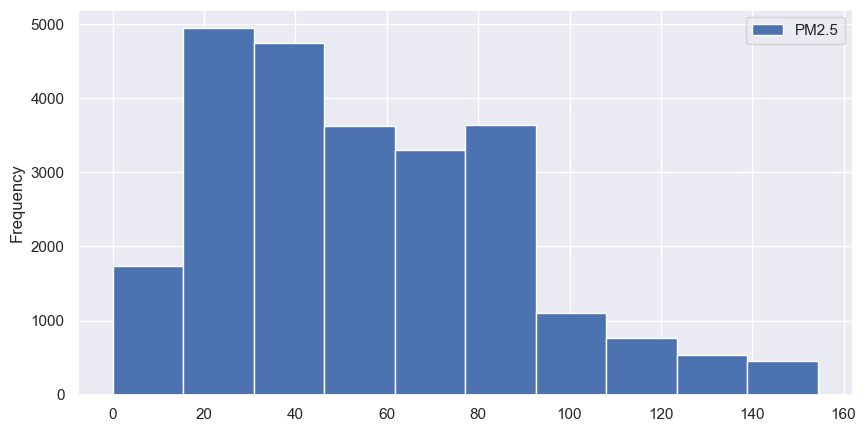

In [132]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

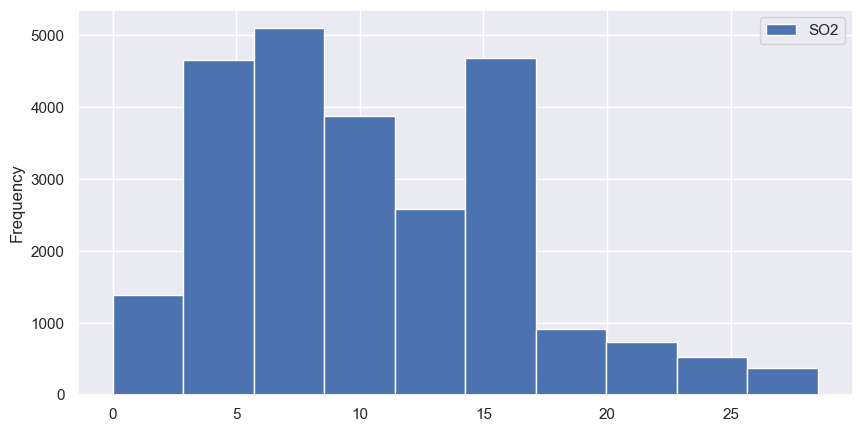

In [133]:
df['SO2'].plot(kind = 'hist', figsize= (10,5))
plt.legend()
plt.show()

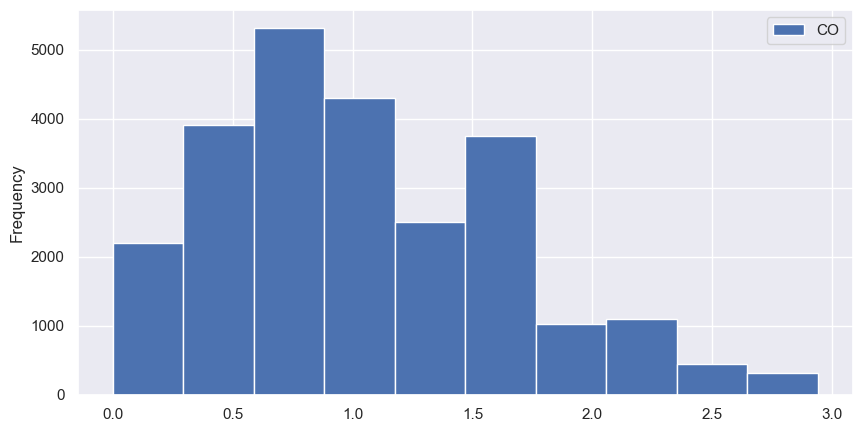

In [134]:
df['CO'].plot(kind = 'hist', figsize= (10,5))
plt.legend()
plt.show()

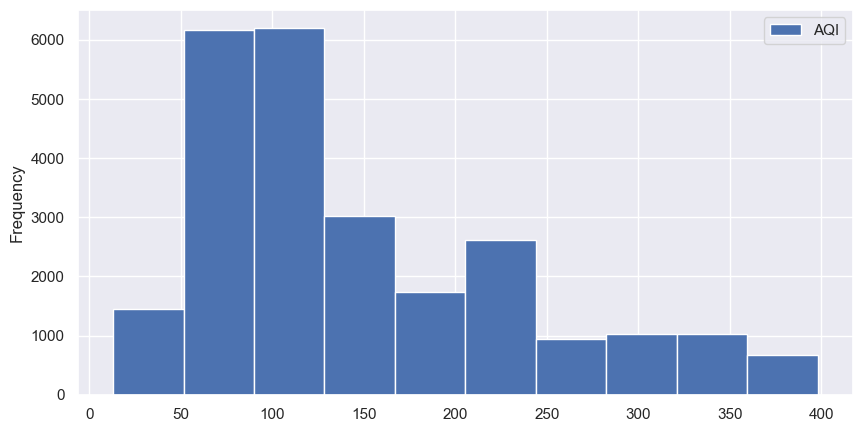

In [135]:
df['AQI'].plot(kind = 'hist', figsize =(10,5))
plt.legend()
plt.show()

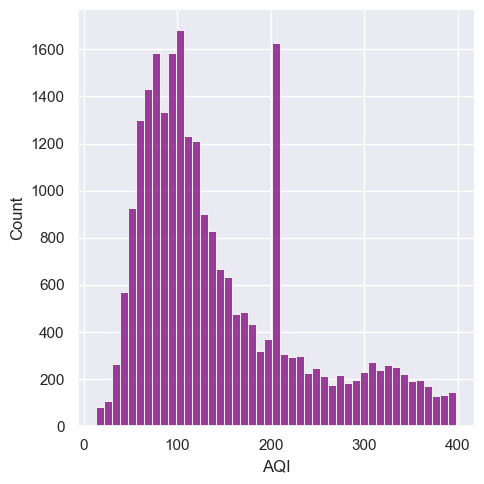

In [136]:
# AQI Distribution from 2015 to 2020
sns.displot(df , x = 'AQI', color='purple')
plt.show()

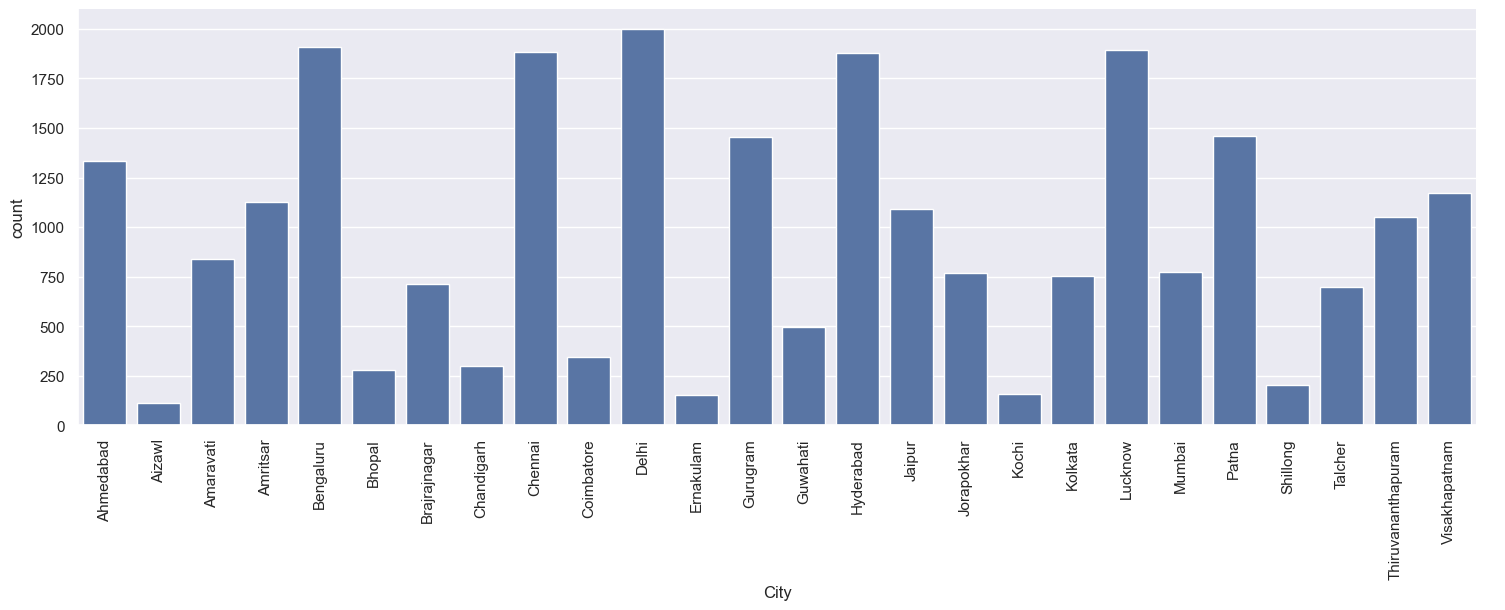

In [137]:
# bivariate

sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, height = 5, aspect=3)
graph.set_xticklabels(rotation=90)

In [138]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, col="AQI_Bucket", col_wrap=2, height = 3.5, aspect=3)
graph.set_xticklabels(rotation=90)

ValueError: Could not interpret value `AQI_Bucket` for `col`. An entry with this name does not appear in `data`.

In [ ]:
graph1= sns.catplot(x='City', y = 'PM2.5', kind='box',data= df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

In [ ]:
graph2 = sns.catplot(x='City', y= 'NO2', kind= 'box', data=df, height= 5, aspect=3)
graph2.set_xticklabels(rotation=90)

In [ ]:
graph3= sns.catplot(x= 'City', y='O3', kind= 'box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

In [ ]:
graph4 = sns.catplot( x='City', y='SO2', kind = 'box', data= df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

In [ ]:
graph5 = sns.catplot( x='AQI_Bucket', data=df, kind='count',height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [ ]:
# check NULL values
df.isnull().sum().sort_values(ascending= True)

In [ ]:
df.describe().loc['mean']

In [ ]:
df= df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683}
    })
    

In [ ]:
df.isnull().sum()

In [ ]:
df=df.drop(['AQI_Bucket'], axis=1)

In [ ]:
df.head()

In [ ]:
sns.boxplot(data= df[['PM2.5', 'PM10']])

In [ ]:
sns.boxplot(data= df[['NO','NO2','NOx','NH3']])

In [ ]:
sns.boxplot(data=df[['O3','SO2']])

In [ ]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1= df[column].quantile(0.25)
        Q3= df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5*IQR
        ub = Q3 + 1.5*IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x< lb else(Q3 if x > ub else x)
        )
    return df

In [ ]:
df = replace_outliers(df)

In [ ]:
df.describe().T

In [ ]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

In [ ]:
sns.boxplot(data= df[['O3','SO2']])

In [ ]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [153]:
df1 = df.select_dtypes(include=[np.number])

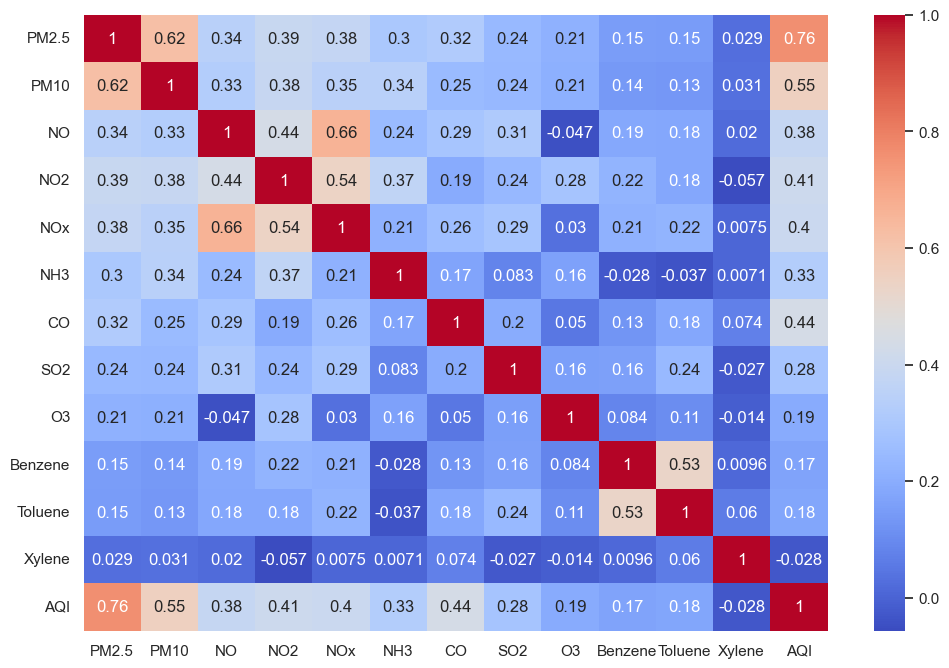

In [154]:
# Multivariate analysis - Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()